In [1]:
import numpy as np
import pandas as pd
import os
import cmcrameri.cm as cmc
from datetime import date
import matplotlib.pyplot as plt
import argparse
import scipy
import seaborn as sns



In [2]:
N_min=10
N_max=500
diff_min=1
diff_max=5


prevalence_ls=[0.0001,0.0005,0.001,0.005,0.01,0.05]

In [3]:
# Build a dataframe with columns: N, Diff, prevalence, p_error
results = []
for diff in np.arange(int(diff_min), int(diff_max+1)):
    for N in np.arange(int(N_min), int(N_max+1)):
        for prevalence in prevalence_ls:
            # Compute probability of at least one error (1 - P(no error))
            p_error = 1 - scipy.stats.binom.cdf(diff-1, N, prevalence)
            results.append({'N': N, 'Diff': diff, 'prevalence': prevalence, 'p_error': p_error})
df_results = pd.DataFrame(results)
df_results.head()

,N,Diff,prevalence,p_error
0,10,1,0.0001,0.001000
1,10,1,0.0005,0.004989
2,10,1,0.0010,0.009955
3,10,1,0.0050,0.048890
4,10,1,0.0100,0.095618


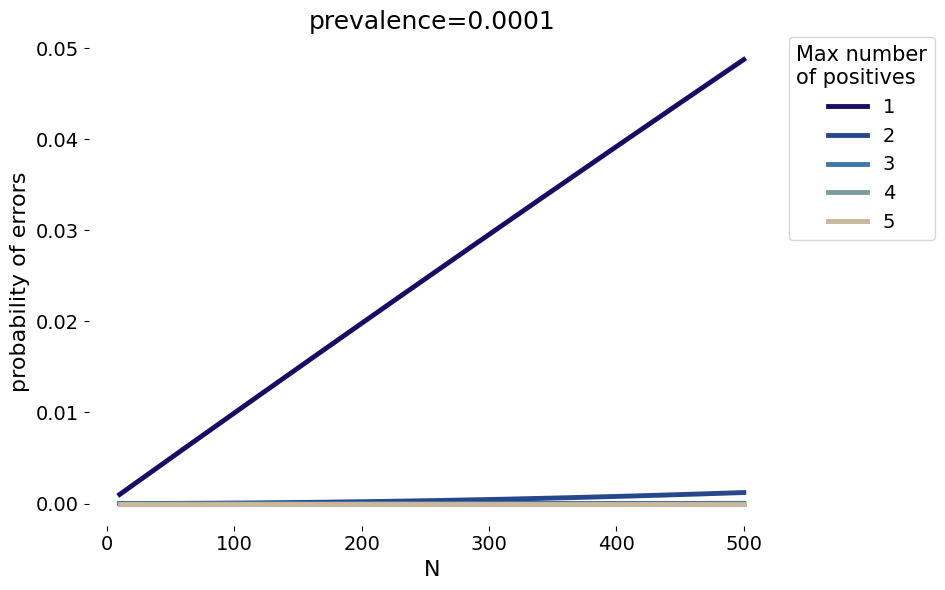

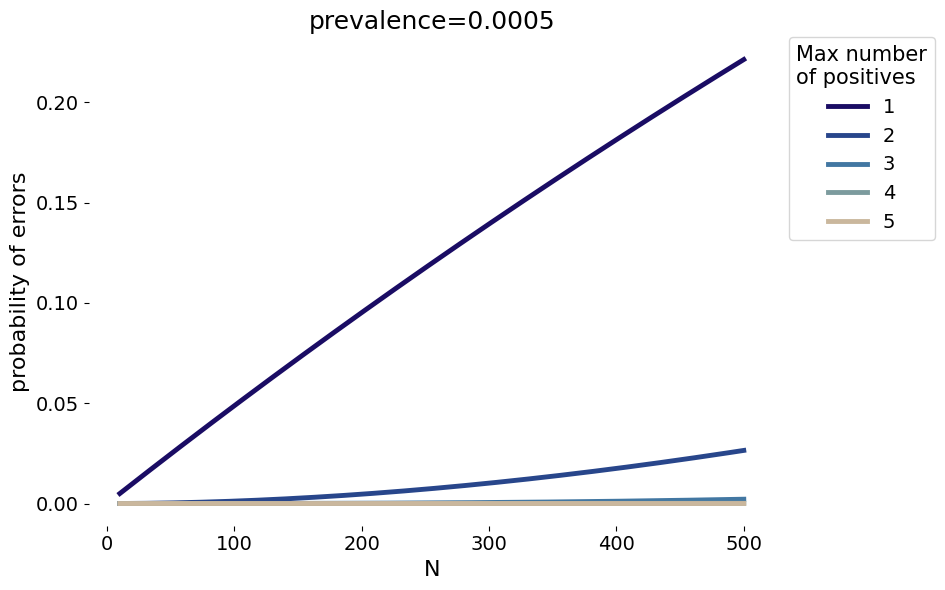

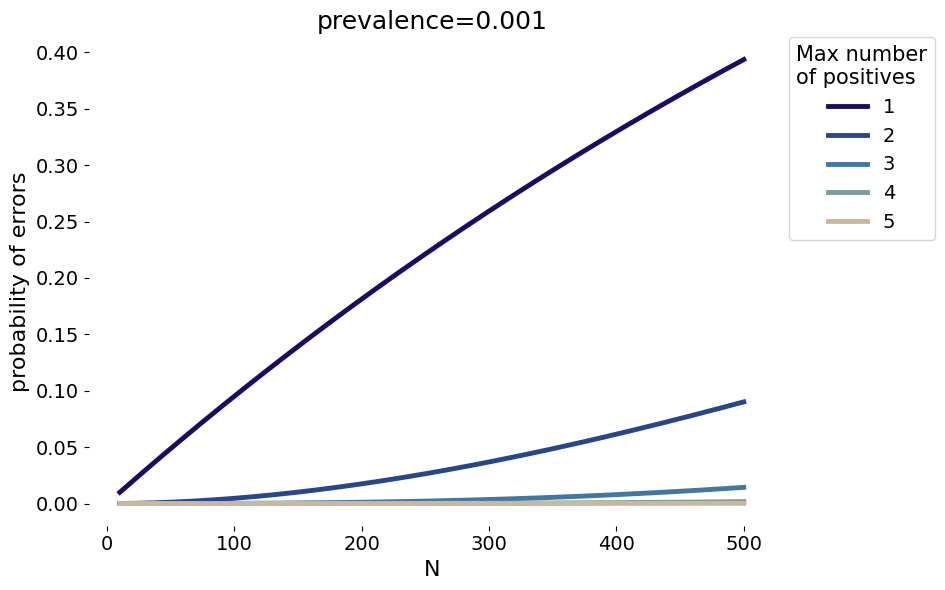

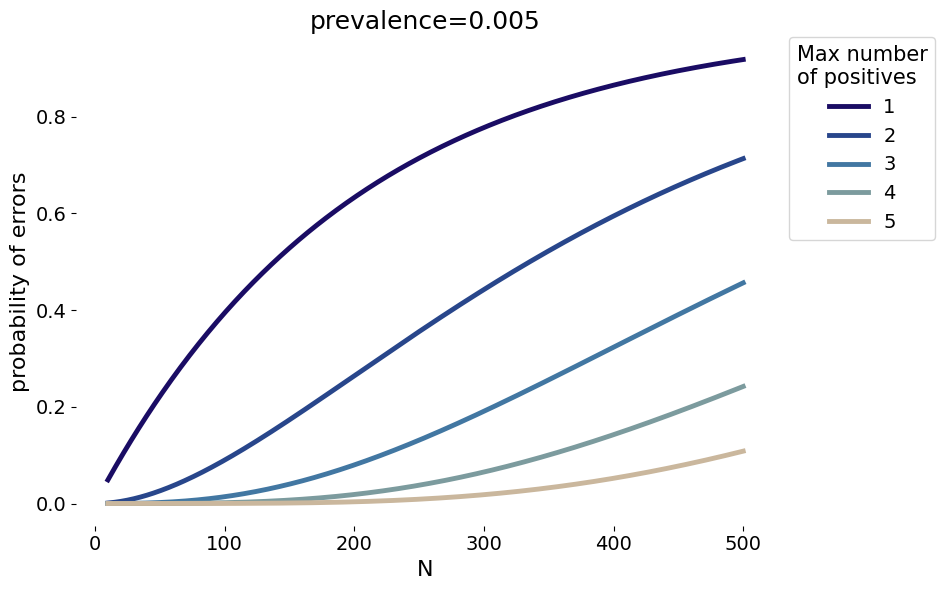

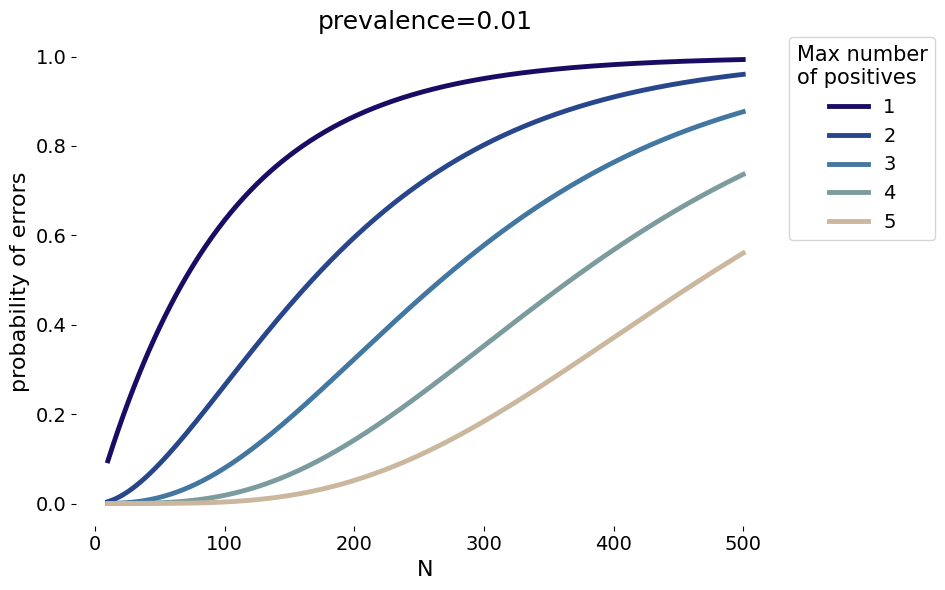

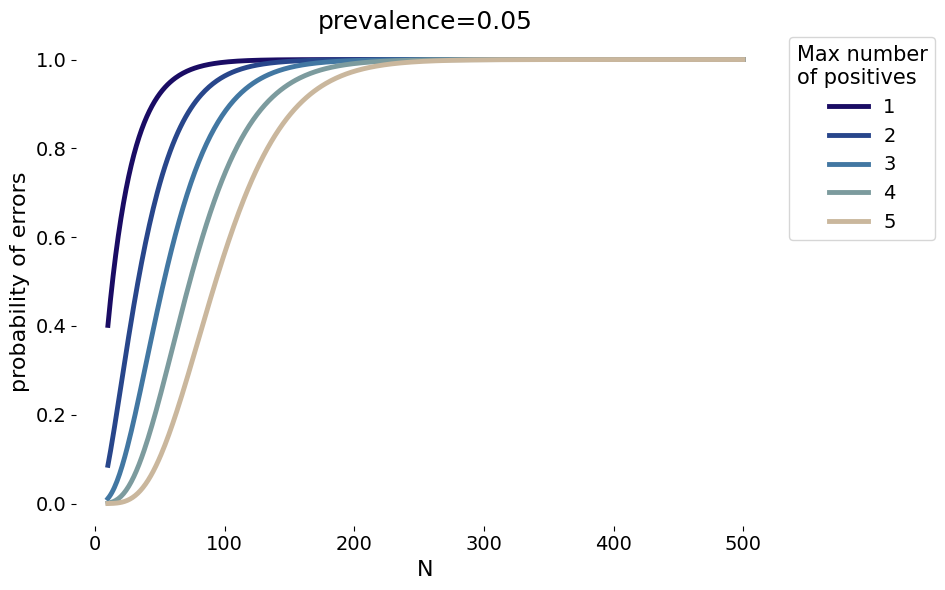

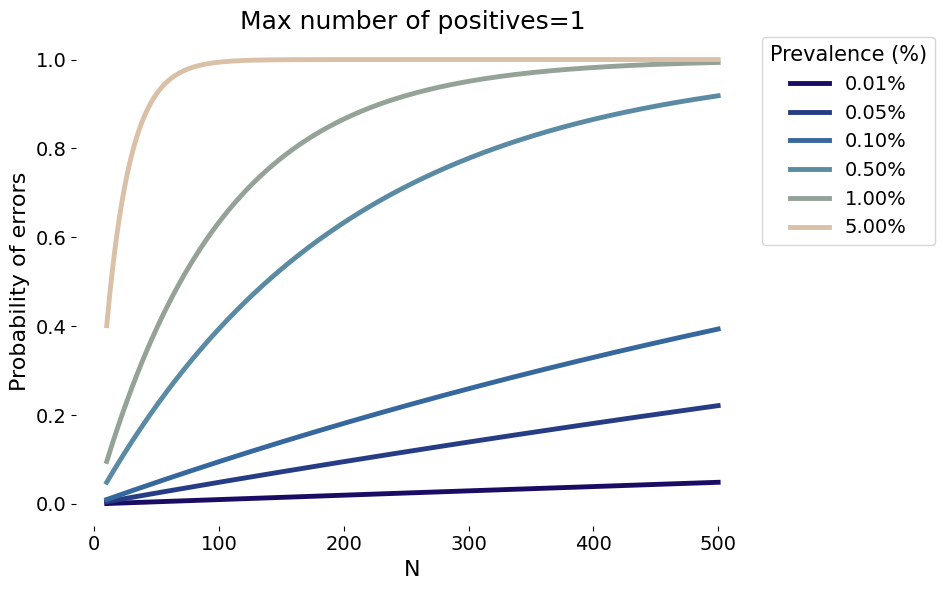

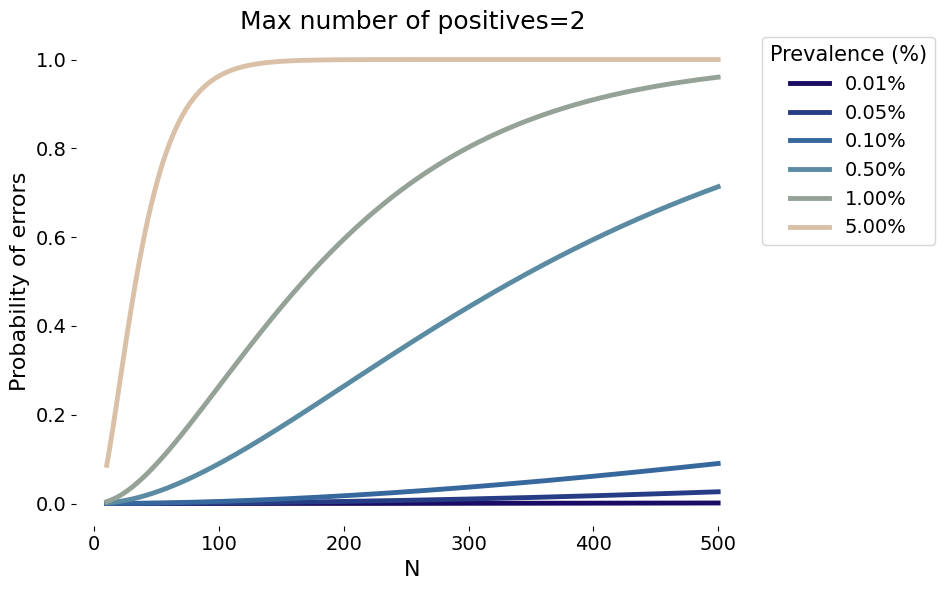

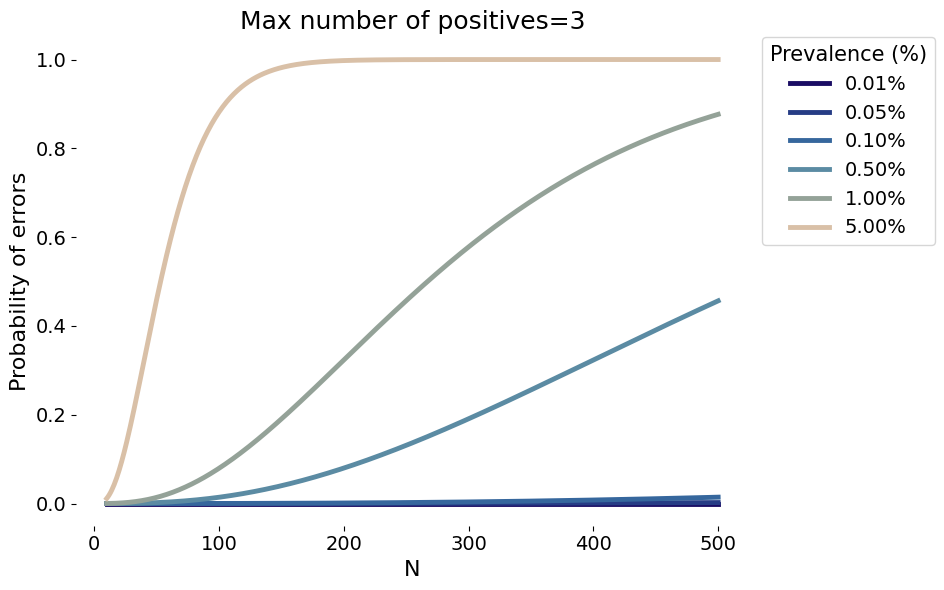

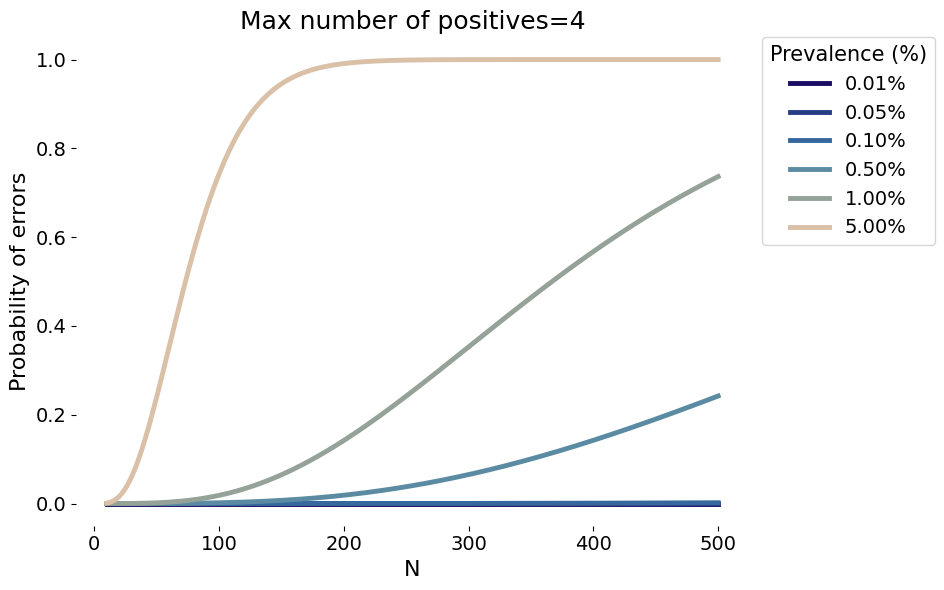

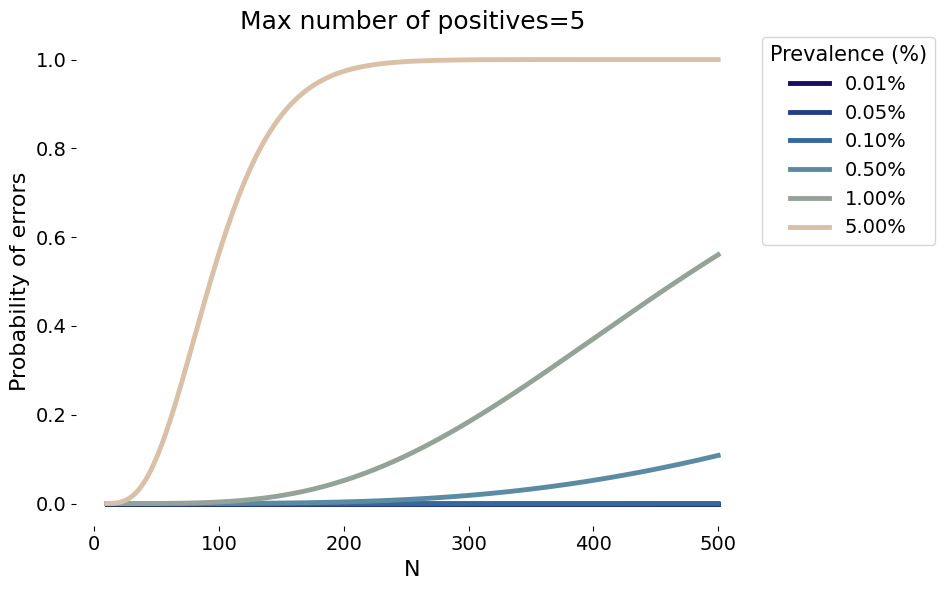

In [7]:
import matplotlib as mpl
import numpy as np
import os
import warnings
import textwrap

# Suppress FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Convert batlow colormap to hex colors for seaborn
batlow_hex = [mpl.colors.to_hex(c) for c in cmc.lapaz.colors]

# Helper to sample palette uniformly
def sample_palette(palette, n):
    idxs = np.linspace(0, len(palette)-1, n+1, dtype=int)
    return [palette[i] for i in idxs[:-1]]

# Ensure prevalence directory exists
prevalence_dir = os.path.join(os.getcwd(), 'prevalence')
os.makedirs(prevalence_dir, exist_ok=True)

# Save the table to the prevalence directory
csv_path = os.path.join(prevalence_dir, 'prevalence_results.csv')
df_results.to_csv(csv_path, index=False)

# Plot 1: One plot per prevalence, color by diff using crameri batlow colormap
for i, prevalence in enumerate(df_results['prevalence'].unique()):
    plt.figure(figsize=(12,6))  # Wider figure
    subset = df_results[df_results['prevalence'] == prevalence]
    n_colors = subset['Diff'].nunique()
    palette = sample_palette(batlow_hex, n_colors)
    ax = sns.lineplot(data=subset, x='N', y='p_error', hue='Diff', palette=palette, linewidth=3.5)
    plt.title(f'prevalence={prevalence}', fontsize=18)
    plt.ylabel('probability of errors', fontsize=16)
    plt.xlabel('N', fontsize=16)
    # Place legend outside to the right
    legend_title = '\n'.join(textwrap.wrap('Max number of positives', width=12))
    handles, labels = ax.get_legend_handles_labels()
    # Make legend lines thicker
    new_handles = []
    for h in handles:
        try:
            h.set_linewidth(3.5)
        except Exception:
            pass
        new_handles.append(h)
    plt.legend(handles=new_handles, labels=labels, title=legend_title, fontsize=14, title_fontsize=15, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    for spine in ax.spines.values():
        spine.set_visible(False)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout(rect=[0, 0, 0.8, 1])
    plot_file = os.path.join(prevalence_dir, f'N_vs_p_error_prevalence_{prevalence}.png')
    plt.savefig(plot_file, dpi=300, bbox_inches='tight')
    plt.show()

# Plot 2: One plot per diff, color by prevalence using crameri batlow colormap
for i, diff in enumerate(df_results['Diff'].unique()):
    plt.figure(figsize=(12,6))  # Wider figure
    subset = df_results[df_results['Diff'] == diff]
    n_colors = subset['prevalence'].nunique()
    palette = sample_palette(batlow_hex, n_colors)
    ax = sns.lineplot(data=subset, x='N', y='p_error', hue='prevalence', palette=palette, linewidth=3.5)
    plt.title(f'Max number of positives={diff}', fontsize=18)
    plt.ylabel('Probability of errors', fontsize=16)
    plt.xlabel('N', fontsize=16)
    # Place legend outside to the right, with prevalence as percentage
    handles, labels = ax.get_legend_handles_labels()
    # Convert prevalence values to percentage strings
    new_labels = []
    for l in labels:
        try:
            val = float(l)
            new_labels.append(f'{val*100:.2f}%')
        except:
            new_labels.append(l)
    # Make legend lines thicker
    new_handles = []
    for h in handles:
        try:
            h.set_linewidth(3.5)
        except Exception:
            pass
        new_handles.append(h)
    plt.legend(handles=new_handles, labels=new_labels, title='Prevalence (%)', fontsize=14, title_fontsize=15, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    for spine in ax.spines.values():
        spine.set_visible(False)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout(rect=[0, 0, 0.8, 1])
    plot_file = os.path.join(prevalence_dir, f'N_vs_p_error_Diff_{diff}.png')
    plt.savefig(plot_file, dpi=300, bbox_inches='tight')
    plt.show()